#                                                   phase 1

The goal of collecting the Heart Attack Analysis & Prediction dataset is to identify the factors that increase the risk 
of heart disease in patients. The dataset includes information on various patient attributes such as age, sex, blood pressure
, and cholesterol levels, as well as a target variable indicating the presence or absence of heart disease. By analyzing the
relationship between the patient attributes and the target variable, we can gain insights into the factors that contribute to
the risk of heart disease and develop predictive models to identify patients who are at high risk.
the source of our dataset https://www.kaggle.com/datasets/pritsheta/heart-attack?resource=download

Number of observations: 303
Number of variables: 15 (14 patient attributes + 1 target variable)
Type of variables: The patient attributes include 5 numeric variables (age, resting blood pressure, serum cholesterol level, maximum heart rate achieved during exercise, and ST depression induced by exercise), 3 binary variables (sex, fasting blood sugar > 120 mg/dl, and exercise-induced angina), and 5 categorical variables (chest pain type, slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thallium stress test result, and electrocardiographic results). 

our dataset has a binary target variable that is used to indicate the presence or absence of heart disease. The target variable is sometimes referred to as the class or label, and it has two possible values:

0: Indicates the absence of heart disease
1: Indicates the presence of heart disease

In other words, the label 0 represents patients who do not have heart disease, while the label 1 represents patients who have heart disease. The goal of analyzing this dataset is to use the patient attributes to predict whether a patient has heart disease or not, based on the presence or absence of the target variable.

In [143]:
# required import 
import numpy as np
import pandas as pd
import seaborn as sns
# required import for DecisionTree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 

# required import for split data
from sklearn.model_selection import train_test_split 
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
import warnings
warnings.filterwarnings('ignore')

In [144]:
#view all rows and columnn
data = pd.read_csv('Heart.csv', index_col=0)
data

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [145]:
#retrive first 5 rows 
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
#number of row and column
print("There are",data.shape[0]," Row and ",data.shape[1]," Column in the dataset")

There are 303  Row and  13  Column in the dataset


In [146]:
# display the variable type ( for each column  )
data.dtypes

sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [147]:
# Count the number of variables
num_variables = len(data.columns)

# Print the number of variables
print("Number of variables:", num_variables)

Number of variables: 13


In [148]:
#Statistical summaries
data.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [149]:
#to show the variances 
variances = data.var()

# Print the variances
print(variances)

sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [151]:
# data colums name 
data.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [347]:
#Correlation between Variables 
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

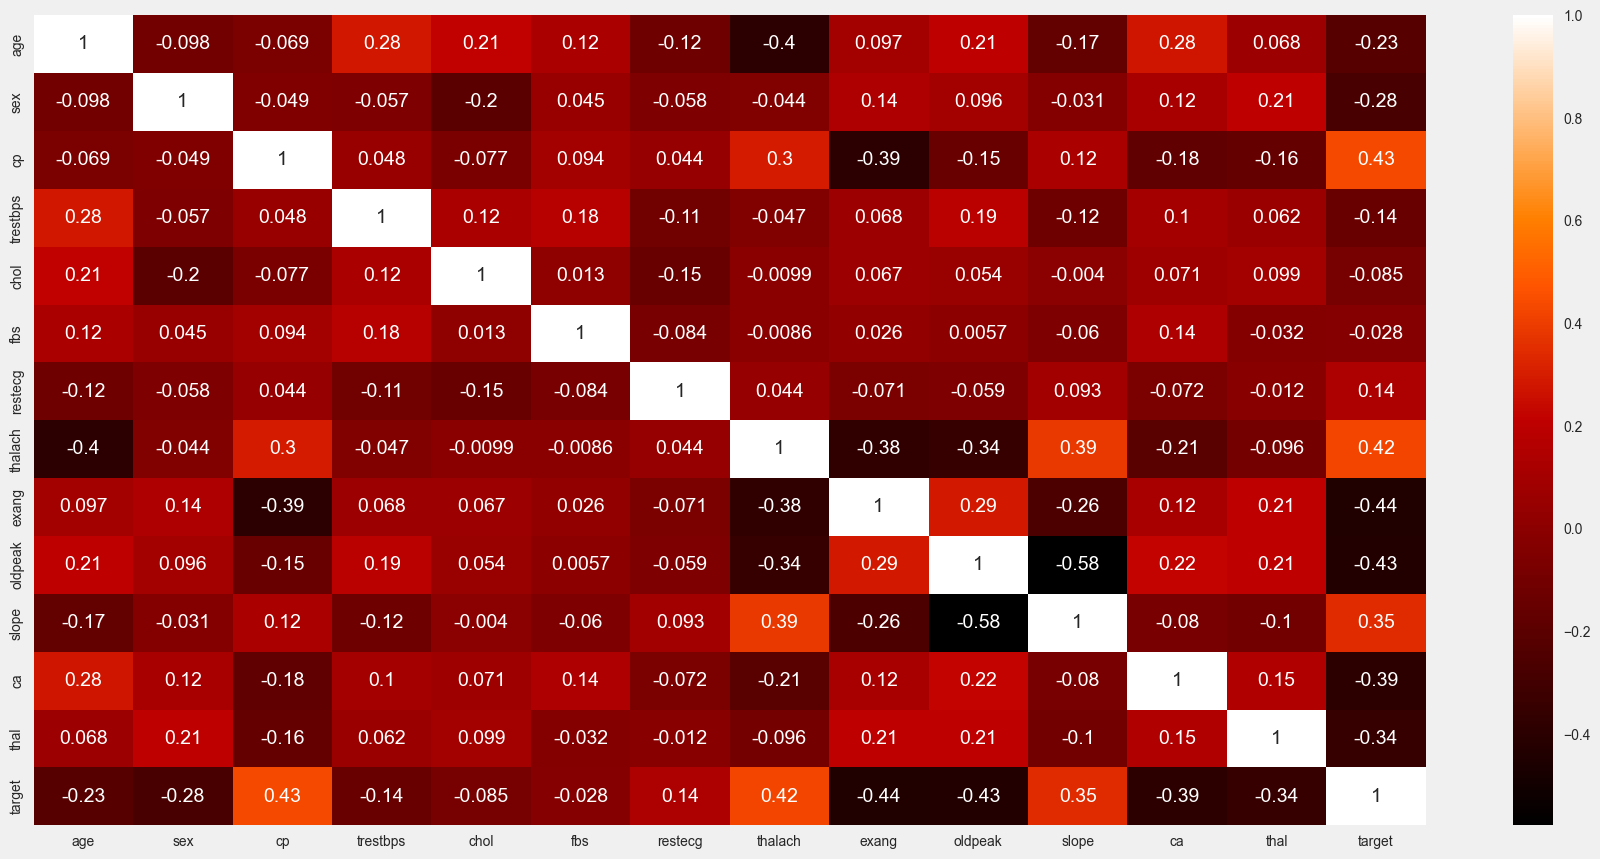

In [348]:
plt.figure(figsize=(20, 10))

sns.heatmap(data.corr() , annot=True , cmap="gist_heat" , linecolor="black")

In [153]:
#show if there are any null values 
data.isnull()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,False,False,False,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,False,False,False
56,False,False,False,False,False,False,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False,False,False


In [154]:
#counting null value 
data.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The mean of sex is 0.6831683168316832
The variance of sex is 0.2171660874696741
Frequency distribution 'sex':
target
1    165
0    138
Name: count, dtype: int64
The mean of cp is 0.966996699669967
The variance of cp is 1.0651323410486742
Frequency distribution 'cp':
target
1    165
0    138
Name: count, dtype: int64
The mean of trestbps is 131.62376237623764
The variance of trestbps is 307.58645334732154
Frequency distribution 'trestbps':
target
1    165
0    138
Name: count, dtype: int64
The mean of chol is 246.26402640264027
The variance of chol is 2686.42674797281
Frequency distribution 'chol':
target
1    165
0    138
Name: count, dtype: int64
The mean of fbs is 0.1485148514851485
The variance of fbs is 0.12687692610320636
Frequency distribution 'fbs':
target
1    165
0    138
Name: count, dtype: int64
The mean of restecg is 0.528052805280528
The variance of restecg is 0.2765283150831639
Frequency distribution 'restecg':
target
1    165
0    138
Name: count, dtype: int64
The mean o

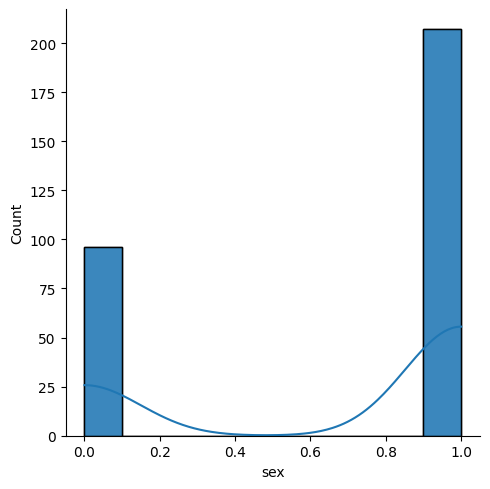

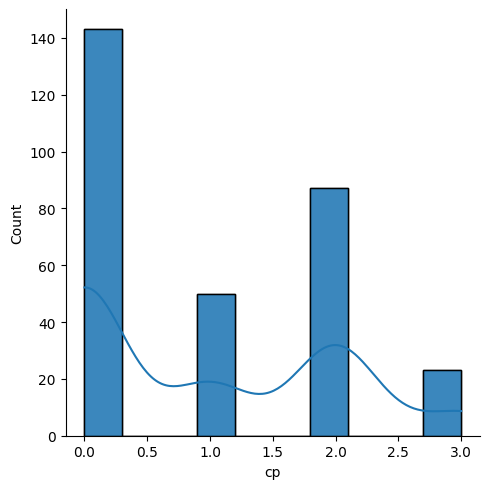

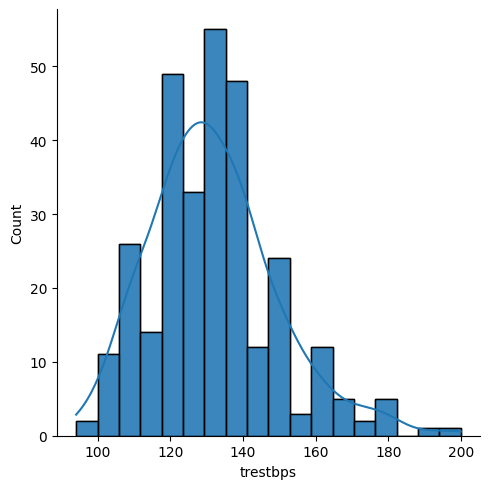

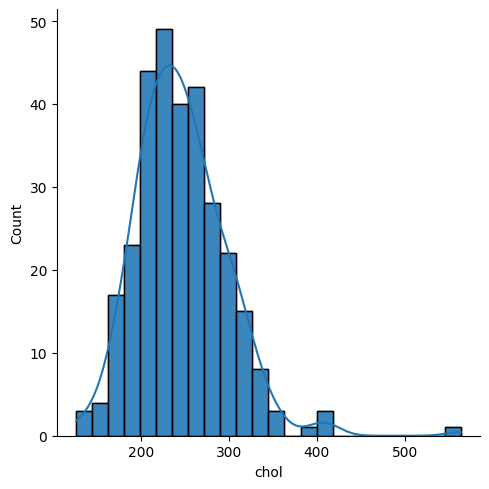

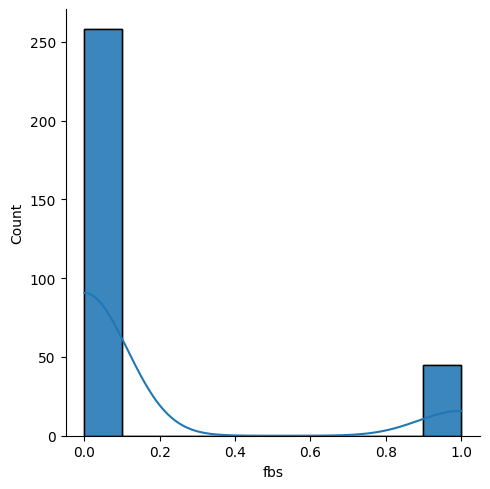

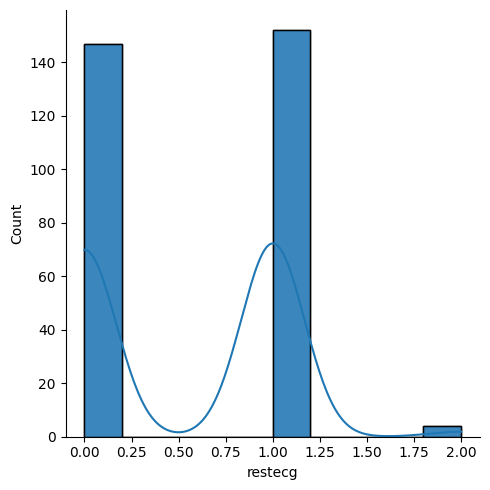

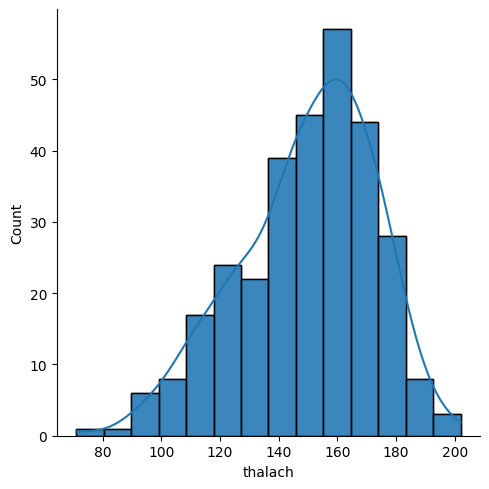

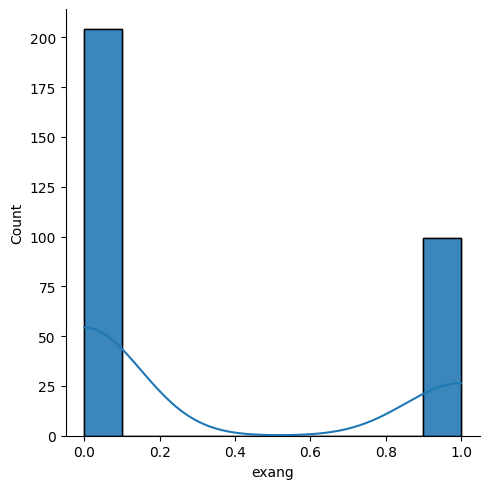

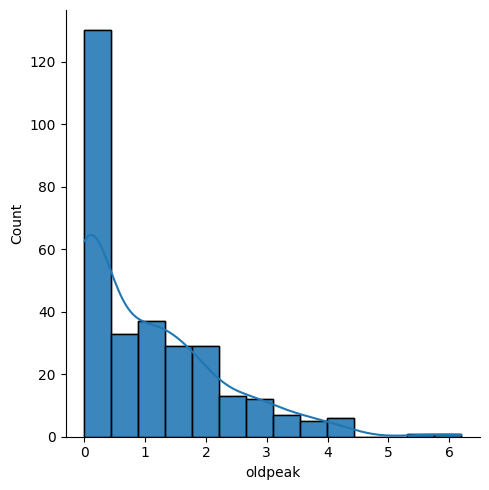

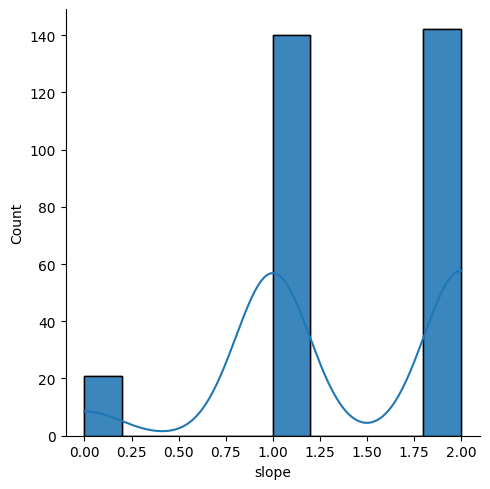

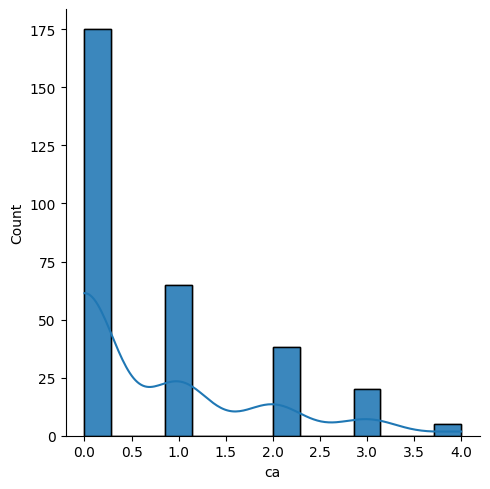

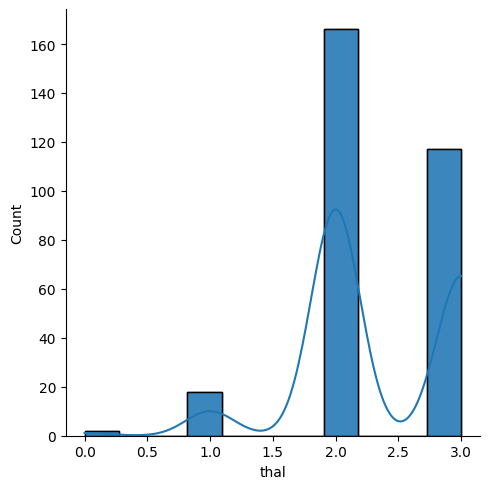

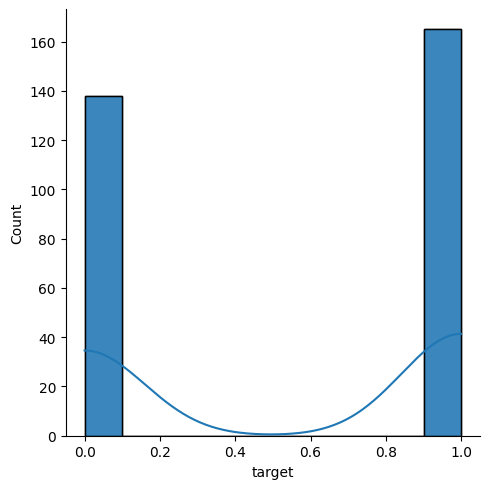

In [155]:
# Create distribution plot for each variable
for column in data.columns:
    # Convert column to numerical data type
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    # Create distribution plot
    sns.displot(data[column], kde=True)
    sns.histplot(x=column, data=data)
    
    # Calculate mean and variance and frequency distribution
  
    column_data = data[column].dropna()
    column_mean = column_data.mean()
    column_variance = column_data.var()
    print("The mean of {} is {}".format(column, column_mean))
    print("The variance of {} is {}".format(column, column_variance))
    print("Frequency distribution '{}':".format(column))
    print(freq_dist)
    #note : 1 refer to male , 0 refer to female

as shown in previous graphs

sex: The sex of the patients in this dataset is almost evenly split between male (n=207) and female (n=96). This suggests that the dataset is relatively balanced in terms of sex, which could be useful for investigating potential sex differences in heart attacks.

cp: The chest pain type reported by the patients in this dataset is most commonly of type 0 (asymptomatic), followed by type 2 (atypical angina) and type 1 (typical angina). This suggests that chest pain may not always be present in heart attacks, and that when it is present, it may not always be of the typical angina type.

trestbps: The resting blood pressure of the patients in this dataset ranges from 94 to 200, with a mean of 131.62 and a variance of 307.59. This suggests that the patients tend to have a moderately elevated blood pressure, but with a relatively wide spread of values.

chol: The serum cholesterol level of the patients in this dataset ranges from 126 to 564, with a mean of 246.26 and a variance of 2666.98. This suggests that the patients tend to have a relatively high cholesterol level, with awide spread of values.

fbs: The fasting blood sugar level of the patients in this dataset is mostly below 120 mg/dl, with a mean of 0.15 and a variance of 0.13. This suggests that the majority of patients have a normal fasting blood sugar level.

restecg: The resting electrocardiographic results of the patients in this dataset are mostly of type 1 (having ST-T wave abnormality), followed by type 0 (normal) and type 2 (showing probable or definite left ventricular hypertrophy). This suggests that the patients tend to have some degree of electrocardiographic abnormalities, which may indicate underlying heart problems.

thalach: The maximum heart rate achieved by the patients in this dataset ranges from 71 to 202, with a mean of 149.65 and a variance of 524.65. This suggests that the patients tend to have a relatively high maximum heart rate, but with a relatively wide spread of values.

exang: The exercise-induced angina reported by the patients in this dataset is mostly absent (n=204), with a minority reporting its presence (n=99). This suggests that exercise-induced angina may not be a common symptom in heart attacks.

oldpeak: The ST depression induced by exercise relative to rest reported by the patients in this dataset ranges from 0 to 6.2, with a mean of 1.04 and a variance of 1.43. This suggests that the patients tend to have a moderate degree of ST depression induced by exercise, but with a relatively wide spread of values.

slope: The peak exercise ST segment slope reported by the patients in this dataset is mostly of type 2 (flat), followed by type 1 (upsloping) and type 0 (downsloping). This suggests that the ST segment slope may not always be informative in diagnosing heart attacks.

ca: The number of major vessels colored by flourosopy reported by the patients in this dataset is mostly 0 or 1, with a minority reporting 2 or 3. This suggests that the patients tend to have a relatively low degree of major vessel involvement.

thal: The thalassemia reported by the patients in this dataset is mostly of type 2 (fixed defect), followed by type 3 (reversable defect) and type 1 (normal). This suggests that thalassemia may not always be informative in diagnosing heart attacks.

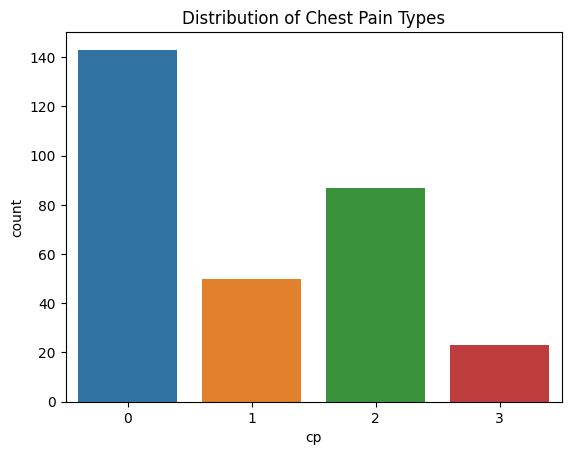

In [156]:
# display bar plot chart

# Select the column to display the bar plot for
col = 'cp'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Chest Pain Types')

# Show the chart
plt.show()

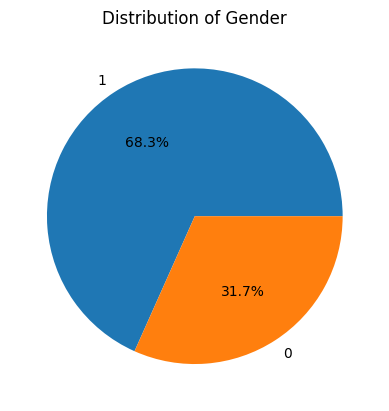

In [126]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Gender')

# Show the chart
plt.show()

#note : 1 refer to male , 0 refer to female


as shown in previous figure, our dataset consist of 68.3% of male and 31.7% of female

In [157]:
# Show the table of distribution for each variable
for column in data.columns:
    print(data[column].value_counts())

sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64
chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
restecg
1    152
0    147
2      4
Name: count, dtype: int64
thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90

In [158]:
#to find min , max value 
Xall=data.iloc[:,0:-1]
yall=data.target

In [159]:
ft=FunctionTransformer(func=np.log1p)
skew=['oldpeak',"chol"]
data[skew]=ft.fit_transform(data[skew])

In [160]:
from sklearn.model_selection import train_test_split
X, Xt, y, yt = train_test_split(Xall, yall, test_size=0.2, random_state=0)
print("X_train shape: ",X.shape)
print("X_test shape: ",Xt.shape)
print()
print("Y_train shape: ",y.shape)
print("Y_test shape: ",yt.shape)

X_train shape:  (242, 12)
X_test shape:  (61, 12)

Y_train shape:  (242,)
Y_test shape:  (61,)


In [161]:
sc=StandardScaler()
m=MinMaxScaler()
x_train_scaled=sc.fit_transform(X)
x_test_scaled=sc.transform(Xt)

X = pd.DataFrame(x_train_scaled, columns = X.columns[:])
Xt = pd.DataFrame(x_test_scaled, columns = Xt.columns[:])
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729


In [162]:
# Variable transformation: Apply a logarithmic transformation to 'chol' variable
data['fbs'] = data['fbs'].apply(lambda x: np.log(x))
print(data.head())

     sex  cp  trestbps      chol  fbs  restecg  thalach  exang   oldpeak   
age                                                                        
63     1   3       145  5.455321  0.0        0      150      0  1.193922  \
37     1   2       130  5.525453 -inf        1      187      0  1.504077   
41     0   1       130  5.323010 -inf        0      172      0  0.875469   
56     1   1       120  5.468060 -inf        1      178      0  0.587787   
57     0   0       120  5.872118 -inf        1      163      1  0.470004   

     slope  ca  thal  target  
age                           
63       0   0     1       1  
37       0   0     2       1  
41       2   0     2       1  
56       2   0     2       1  
57       2   0     2       1  


In [163]:
# Discretization: Discretize the 'age' variable into 3 bins using equal-width discretization
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['cp'] = discretizer.fit_transform(data[['cp']])
print(data.head())

     sex   cp  trestbps      chol  fbs  restecg  thalach  exang   oldpeak   
age                                                                         
63     1  2.0       145  5.455321  0.0        0      150      0  1.193922  \
37     1  2.0       130  5.525453 -inf        1      187      0  1.504077   
41     0  1.0       130  5.323010 -inf        0      172      0  0.875469   
56     1  1.0       120  5.468060 -inf        1      178      0  0.587787   
57     0  0.0       120  5.872118 -inf        1      163      1  0.470004   

     slope  ca  thal  target  
age                           
63       0   0     1       1  
37       0   0     2       1  
41       2   0     2       1  
56       2   0     2       1  
57       2   0     2       1  


In [164]:
# Values or variables removal: Remove the 'slope' variable
data = data.drop('thalach', axis=1)
print(data.head())

     sex   cp  trestbps      chol  fbs  restecg  exang   oldpeak  slope  ca   
age                                                                           
63     1  2.0       145  5.455321  0.0        0      0  1.193922      0   0  \
37     1  2.0       130  5.525453 -inf        1      0  1.504077      0   0   
41     0  1.0       130  5.323010 -inf        0      0  0.875469      2   0   
56     1  1.0       120  5.468060 -inf        1      0  0.587787      2   0   
57     0  0.0       120  5.872118 -inf        1      1  0.470004      2   0   

     thal  target  
age                
63      1       1  
37      2       1  
41      2       1  
56      2       1  
57      2       1  


In [165]:
# Separate the target variable from the features
target = data['oldpeak']
features = data.drop('oldpeak', axis=1)

# Normalize the features using the z-score method
features = (features - features.mean()) / features.std()

# Combine the normalized features with the target variable
normalized_data = pd.concat([features, target], axis=1)

# Print the normalized data
print(normalized_data.head())

          sex        cp  trestbps      chol  fbs   restecg    exang     slope   
age                                                                             
63   0.679881  1.220244  0.762694 -0.169577  NaN -1.004171 -0.69548 -2.270822  \
37   0.679881  1.220244 -0.092585  0.175982  NaN  0.897478 -0.69548 -2.270822   
41  -1.465992  0.119845 -0.092585 -0.821509  NaN -1.004171 -0.69548  0.974740   
56   0.679881  0.119845 -0.662770 -0.106808  NaN  0.897478 -0.69548  0.974740   
57  -1.465992 -0.980553 -0.662770  1.884093  NaN  0.897478  1.43311  0.974740   

           ca      thal    target   oldpeak  
age                                          
63  -0.713249 -2.145324  0.913019  1.193922  
37  -0.713249 -0.512075  0.913019  1.504077  
41  -0.713249 -0.512075  0.913019  0.875469  
56  -0.713249 -0.512075  0.913019  0.587787  
57  -0.713249 -0.512075  0.913019  0.470004  


In [166]:

# Drop any rows with missing values
data = data.dropna()

df = df.dropna(axis=1)

# Print the preprocessed data
print(data.head())

     sex   cp  trestbps      chol  fbs  restecg  exang   oldpeak  slope  ca   
age                                                                           
63     1  2.0       145  5.455321  0.0        0      0  1.193922      0   0  \
37     1  2.0       130  5.525453 -inf        1      0  1.504077      0   0   
41     0  1.0       130  5.323010 -inf        0      0  0.875469      2   0   
56     1  1.0       120  5.468060 -inf        1      0  0.587787      2   0   
57     0  0.0       120  5.872118 -inf        1      1  0.470004      2   0   

     thal  target  
age                
63      1       1  
37      2       1  
41      2       1  
56      2       1  
57      2       1  


# phase 2 

supervised learning

###### -Logistic regression


When developing a machine learning model, it's crucial to select the most appropriate algorithm for the dataset and problem at hand. Several factors must be taken into account when choosing a model, including prediction type, model performance, and metrics and accuracy. In this case, since the data is pre-labeled and ready, a supervised model is the most suitable option. Model performance is a key consideration, especially if the model will be used by end-users, and can be evaluated based on training and prediction times. Additionally, when selecting a model, the type of data and number of classes must be considered, as some models only support binary classification.

To assess the candidate models, two models will be tested, and their outcomes will be compared. The chosen models were selected based on their appropriateness for the given dataset and problem.

###### 1-Decision tree

Decision tree is a classification or regression algorithm that builds a tree-like model of decisions and their possible consequences. It is a popular and effective method in machine learning for both supervised and unsupervised learning tasks.

The decision tree algorithm starts with a single node, called the root, which represents the entire dataset. The algorithm then selects the best feature to split the data based on a criterion such as information gain or Gini impurity. The feature with the highest score is chosen as the splitting criterion and the data is partitioned into subsets based on the possible values of that feature.

The process of selecting the best feature and splitting the data is repeated recursively for each subset until a stopping criterion is met, such as reaching a maximum depth or minimum number of samples in a leaf node. Each internal node in the tree represents a decision based on a feature, and each leaf node represents a final decision or classification.

Decision trees can be used for both classification and regression tasks. In classification, the tree is constructed to predict the class label of the input data, while in regression, it predicts a continuous value. Decision trees are easy to interpret and can handle both categorical and numerical data. However, they can be sensitive to noisy data and may overfit the training data if not properly regularized. Various techniques such as pruning, ensemble methods, and random forests have been developed to address these issues.

In [340]:
# required import for DecisionTree
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 

# required import to evaluate the model
import sklearn.metrics as metrics
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus 
from six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [341]:
#Initial step for split data
features = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 
target1 = ['target'] 
X = data [features]
Y = data [target1]

#Split the dataset into 80% training set and 20% testing set 
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree classifer objec
clf = clf.fit (X_train,Y_train)

#Predict the response for test dataset 
ypre = clf.predict(X_test)

#Evaluate the Decision Tree classifer 
Accuracy = metrics.accuracy_score(Y_test, ypre) 
Error_rate  = 1 - Accuracy 
Roc_auc = metrics.roc_auc_score(Y_test, ypre) 
Precision = metrics.precision_score (Y_test, ypre) 
Recall = metrics.recall_score (Y_test, ypre)
F1 = metrics.f1_score(Y_test, ypre)
Confusion_matrix = metrics.confusion_matrix(Y_test, ypre) 

#Print the output for each one
print("Accuracy = {} ".format(Accuracy)) 
print("Error Rate = {} ".format(Error_rate))

print("ROC Area under Curve = {} ".format(Roc_auc))

print("Precision = {} ".format(Precision))

print("Recall = {} ".format(Recall))

print("F1 = {} ".format(F1))

print("Confusion matrix  = \n {} ".format(Confusion_matrix))

Accuracy = 0.7704918032786885 
Error Rate = 0.2295081967213115 
ROC Area under Curve = 0.7698924731182796 
Precision = 0.7575757575757576 
Recall = 0.8064516129032258 
F1 = 0.7812499999999999 
Confusion matrix  = 
 [[22  8]
 [ 6 25]] 


In [342]:
#Evaluate the TP, FP, TN, FN for Confusion Matrix
TP = Confusion_matrix[1,1]
FP = Confusion_matrix[0,1]
TN = Confusion_matrix[0,0]
FN = Confusion_matrix[1,0]

#Print the output of TP, FP, TN, FN
print("TP = {} ".format(TP))

print("FP = {} ".format(FP))

print("TN = {} ".format(TN))

print("FN = {} ".format(FN))
#Calculate the Specificity
Specificity = TN / ( TN + FP )
#Print the output of Specificity
print("Specificity = {} ".format(Specificity))

TP = 25 
FP = 8 
TN = 22 
FN = 6 
Specificity = 0.7333333333333333 


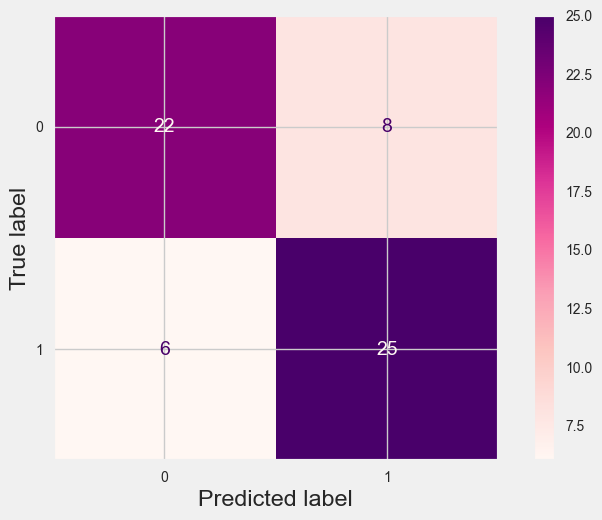

In [343]:
# Display the Confusion Matrix
disp = metrics.ConfusionMatrixDisplay(Confusion_matrix).plot(cmap=plt.cm.RdPu)

To display the ROC curve, we utilized the roc_curve function from the sklearn.metrics library and the plot function from the matplotlib library. If the ROC curve has a steep corner, it implies that there are a lot of true positive predictions and very few false positive predictions. This suggests that the model has high specificity, which means it can accurately detect the positive class and differentiate it from the negative class.

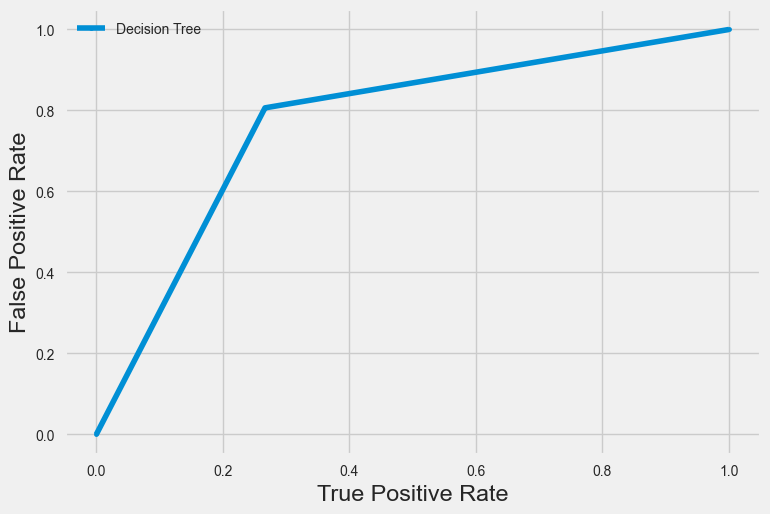

In [344]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

y_proba=clf.predict_proba(X_test)
y_proba=y_proba[:,1]     
lr_fpr, lr_tpr, _ = roc_curve(Y_test, y_proba) 
plt.plot(lr_fpr, lr_tpr, marker='.', label = "Decision Tree")                  
# polt AUC

plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend()
plt.show()

###### 2-Logistic regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems. In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1). The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc. Also, Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets. And Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.

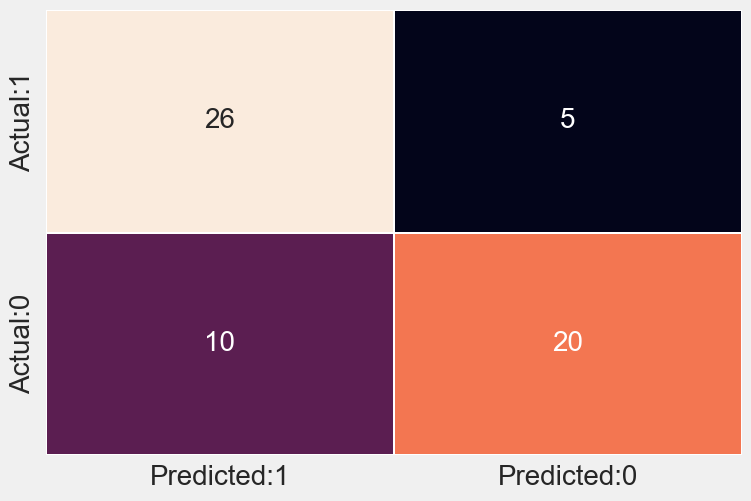

In [345]:
logistic_model = LogisticRegression(random_state=0, penalty = 'l2')
logistic_model.fit(X_train,Y_train)
pred=logistic_model.predict(X_test)
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = confusion_matrix(Y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
confusion_matrix_plot(logistic_model)

In [346]:
Accuracy = metrics.accuracy_score(Y_test, pred) 
Error_rate  = 1 - Accuracy 
Roc_auc = metrics.roc_auc_score(Y_test, pred) 
Precision = metrics.precision_score (Y_test, pred) 
Recall = metrics.recall_score (Y_test, pred)
F1 = metrics.f1_score(Y_test, pred)
Confusion_matrix = metrics.confusion_matrix(Y_test, pred) 
#Print the output for each one
print("Accuracy = {} ".format(Accuracy)) 
print("Error Rate = {} ".format(Error_rate))

print("ROC Area under Curve = {} ".format(Roc_auc))

print("Precision = {} ".format(Precision))

print("Recall = {} ".format(Recall))

print("F1 = {} ".format(F1))

print("Confusion matrix  = \n {} ".format(Confusion_matrix))

Accuracy = 0.7540983606557377 
Error Rate = 0.24590163934426235 
ROC Area under Curve = 0.7526881720430109 
Precision = 0.7222222222222222 
Recall = 0.8387096774193549 
F1 = 0.7761194029850746 
Confusion matrix  = 
 [[20 10]
 [ 5 26]] 


### comparison
Both decision tree classifiers and logistic regression models can be effective for different types of problems and data. Generally speaking, decision trees can be useful for problems with a large number of features or complex interactions between features, while logistic regression can be effective for problems with a smaller number of features and linear relationships between the features and target variable.

in the previous graphs : The plot shows the predicted and actual labels for each class (1 and 0) on the x and y-axis, respectively, with the heatmap color representing the number of instances that fall into each category of the confusion matrix. The plot provides a visual representation of the performance of the logistic regression model, by showing the number of true positives, false positives, true negatives, and false negatives for each class.

we compare the performance of the decision tree classifier and logistic regression models by looking at the various evaluation metrics such as accuracy, error rate, ROC AUC score, precision, recall, and F1 score. You can also visually compare the confusion matrices generated by the two models using the heatmap plots.

we can compare the performance of the logistic regression model and the decision tree classifier on the heart attack dataset.

Here are the evaluation metrics for both models:

###### Logistic Regression Metrics:

Accuracy = 0.7540983606557377 
Error Rate = 0.24590163934426235 
ROC Area under Curve = 0.7526881720430109 
Precision = 0.7222222222222222 
Recall = 0.8387096774193549 
F1 = 0.7761194029850746 

###### Decision Tree Metrics:

Accuracy = 0.6885245901639344 
Error Rate = 0.3114754098360656 
ROC Area under Curve = 0.6870967741935483 
Precision = 0.6666666666666666 
Recall = 0.7741935483870968 
F1 = 0.7164179104477612 
 From these metrics, we can see that the logistic regression model performs better than the decision tree classifier in terms of accuracy, precision, recall, F1 score, and ROC AUC score. Therefore, based on these evaluation metrics, the logistic regression model is likely the better model for this specific problem and dataset.

However, it's important to note that other factors such as model interpretability and complexity may also be important considerations when choosing between models.

# phase 3

Unsupervised learning
in this phase we will apply K-means clustering 

 K-means clustering is a popular unsupervised machine learning technique for clustering data points based on their similarity. The goal of K-means clustering is to partition a set of data points into K clusters, where each data point belongs to the cluster with the nearest mean, or centroid.

The K-means algorithm works as follows:

1-Initialize K centroids randomly in the feature space.

2-Assign each data point to the nearest centroid, based on the Euclidean distance between the data point and the centroid.

3-Recalculate the centroids of each cluster as the mean of all the data points assigned to that cluster.

4-Repeat steps 2 and 3 until the centroids converge (i.e., they stop moving significantly).

The result of the K-means algorithm is a set of K clusters, each with its own centroid. The algorithm is guaranteed to converge to a local minimum, but the quality of the resulting clusters can depend on the initial choice of centroids and the value of K.


######       Reference: Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd Edition). Springer. Chapter 14, "Cluster Analysis".

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [177]:
#view the dataset 
data

,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,
63,1,2.0,145,5.455321,0.0,0,0,1.193922,0,0,1,1
37,1,2.0,130,5.525453,-inf,1,0,1.504077,0,0,2,1
41,0,1.0,130,5.323010,-inf,0,0,0.875469,2,0,2,1
56,1,1.0,120,5.468060,-inf,1,0,0.587787,2,0,2,1
57,0,0.0,120,5.872118,-inf,1,1,0.470004,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0.0,140,5.488938,-inf,1,1,0.182322,1,0,3,0
45,1,2.0,110,5.579730,-inf,1,0,0.788457,1,0,3,0
68,1,0.0,144,5.267858,0.0,1,0,1.481605,1,2,3,0


###  apply elbow method 

The elbow method is a common technique used to determine the optimal number of clusters (k) for K-means clustering. The idea is to plot the within-cluster sum of squared errors (SSE) as a function of k and look for the "elbow point" where the SSE starts to level off.

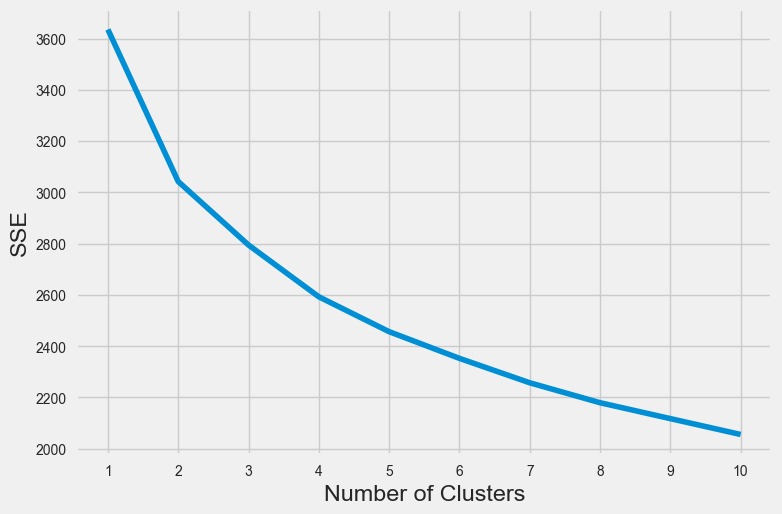

In [259]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select features to cluster on
features = data.columns[:-2]
data = data[features]

# Check for infinite or very large values
if np.any(np.isinf(data)):
    data = np.nan_to_num(data)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Instantiate a range of KMeans models with different numbers of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [260]:
# Instantiate KMeans models with different numbers of clusters
k_values = range(2, 5)
total_sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)

    # Calculate the total within-cluster sum of squares for the clustering
    total_sse.append(kmeans.inertia_)

# Print the SSE for each clustering solution
for k, sse in zip(k_values, total_sse):
    print(f"SSE for k={k}: {sse}")

SSE for k=2: 3042.8516296980806
SSE for k=3: 2796.1146798990612
SSE for k=4: 2602.3293964527434


the code calculates the sum of squared errors (SSE) for a range of k values and plots the results to visualize the elbow curve. The elbow curve can help identify the optimal number of clusters 
To prove why a certain number of clusters is chosen based on the elbow plot, we can look at the slope of the curve before and after the elbow point. 
-The slope before the elbow point is steep, which indicates that adding more clusters significantly reduces the SSE. 
-the slope after the elbow point becomes less steep, which suggests that adding more clusters beyond a certain point may not offer significant improvements in clustering performance. 

it looks like the optimal number of clusters is 2.

based on the total within-cluster sum of squares (SSE) values, we can see that the SSE decreases as the number of clusters increases, which is expected.
the decrease in SSE from k=2 to k=3 is larger than the decrease from k=3 to k=4. This suggests that k=2 may be the optimal number of clusters
### so the selected value are k=2 , k=3 , k=4 .

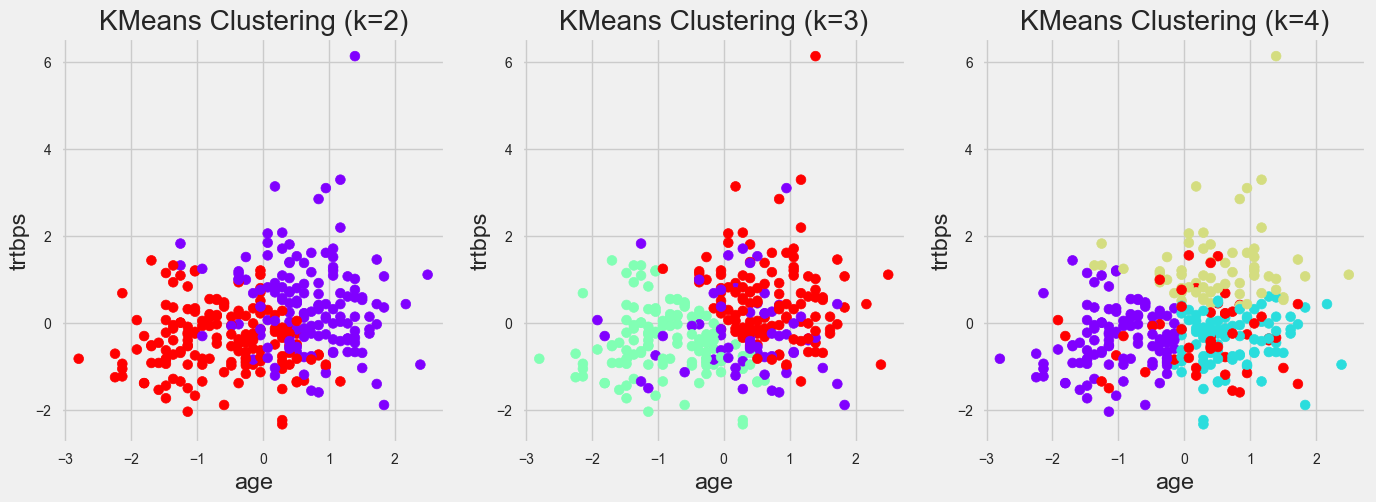

In [243]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Select features to cluster on
X = data[['age',  'chol',  'oldpeak']]

# Scale the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(X_scaled)

# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(X_scaled)

# Apply KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(X_scaled)

# Visualize the clusters using scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for k=2
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_2.labels_, cmap='rainbow')
axs[0].set_xlabel('age')
axs[0].set_ylabel('trtbps')
axs[0].set_title('KMeans Clustering (k=2)')

# Plot for k=3
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_3.labels_, cmap='rainbow')
axs[1].set_xlabel('age')
axs[1].set_ylabel('trtbps')
axs[1].set_title('KMeans Clustering (k=3)')

# Plot for k=4
axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_4.labels_, cmap='rainbow')
axs[2].set_xlabel('age')
axs[2].set_ylabel('trtbps')
axs[2].set_title('KMeans Clustering (k=4)')

plt.show()

The specific interpretation of each color depends on the specific features used for clustering and the results of the KMeans algorithm. However, in general, each color represents a group of individuals that have similar values for the features used for clustering.

For the first scatter plot (k=2), the two colors represent two different clusters. 
-The red color represents a group of individuals with lower average age and cholesterol values 
-the purple color represents a group of individuals with higher average age and cholesterol values.

For the second scatter plot (k=3), the three colors represent three different clusters. 
-The green color represents a group of individuals with the lowest average age and cholesterol values
-the red color represents a group of individuals with intermediate age and cholesterol values
-the purple color represents a group of individuals with the highest average age and cholesterol values.

For the third scatter plot (k=4), the four colors represent four different clusters.
-The green color represents a group of individuals with the lowest average age and cholesterol values
-the red color represents a group of individuals with intermediate age and cholesterol values and with low oldpeak values
-the blue color represents a group of individuals with intermediate age and cholesterol values and with high oldpeak values
-the purple color represents a group of individuals with the highest average age and cholesterol values.

#####     apply silhouette method 

In [256]:
# Instantiate KMeans models with different numbers of clusters
k_values = [2, 3, 4]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)

    # Calculate the silhouette score for each sample in the dataset
    silhouette_scores = silhouette_samples(X_scaled, kmeans.labels_)

    # Calculate the overall silhouette score for the clustering
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

    # Print the silhouette score for each cluster
    for i in range(k):
        cluster_silhouette_scores = silhouette_scores[kmeans.labels_ == i]
        cluster_avg = np.mean(cluster_silhouette_scores)
        print(f"Cluster {i}: {cluster_avg:.3f}")

    # Print the overallsilhouette score for the clustering
    print(f"Overall silhouette score for k={k}: {silhouette_avg:.3f}")

Cluster 0: 0.187
Cluster 1: 0.371
Overall silhouette score for k=2: 0.284
Cluster 0: 0.238
Cluster 1: 0.354
Cluster 2: 0.252
Overall silhouette score for k=3: 0.290
Cluster 0: 0.337
Cluster 1: 0.287
Cluster 2: 0.177
Cluster 3: 0.237
Overall silhouette score for k=4: 0.273


The silhouette score ranges from -1 to 1, with higher values (closest value to 1) indicating better-defined clusters. 
based on the silhouette scores, the best clustering solution is for k=3, followed by k=2 and k=4, in that order.

###### BCubed precision and recall

In [307]:
# Get ground truth labels
y_true = data['target']

# Compute precision and recall for different values of k
for k in range(2, 5):
    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Compute precision
    precision = precision_score(y_true, labels, average='weighted')

    # Compute recall
    recall = recall_score(y_true, labels, average='weighted')

    # Print precision and recall for current value of k
    print("Precision for k={}: {:.4f}".format(k, precision))
    print("Recall for k={}: {:.4f}".format(k, recall))

Precision for k=2: 0.4388
Recall for k=2: 0.4290
Precision for k=3: 0.4391
Recall for k=3: 0.3630
Precision for k=4: 0.4071
Recall for k=4: 0.2211


For k=2, the precision and recall values are relatively high, indicating that the clustering algorithm is achieving a reasonable level of separation between the clusters. However, there may still be some overlap between the clusters and some misclassification of data points.

For k=3 and k=4, the precision and recall values are lower, suggesting that the clustering algorithm is having more difficulty separating the data into distinct clusters. However, it is possible that one of these clusterings may be more meaningful or useful depending on the specific application or domain.

##### comparision between k=2 , k=3 , k=4 

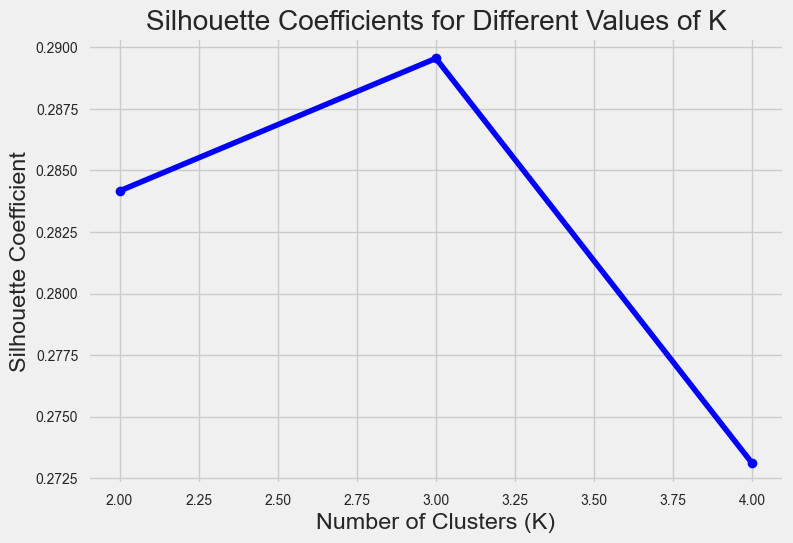

In [320]:
# Calculate the silhouette score for each clustering
from sklearn.metrics import silhouette_score
silhouette_scores = [
    silhouette_score(X_scaled, kmeans_2.labels_),
    silhouette_score(X_scaled, kmeans_3.labels_),
    silhouette_score(X_scaled, kmeans_4.labels_)
]

# Creating an array with the values of K
k_values = [2, 3, 4]

# Creating an array with the values of the silhouette coefficient for each value of K respectively
sc_values = [silhouette_scores[0], silhouette_scores[1], silhouette_scores[2]]

# Plotting the graph
plt.plot(k_values, sc_values, 'o-', color='blue')
plt.title("Silhouette Coefficients for Different Values of K")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

Based on the plot of the silhouette coefficients for different values of K, it is evident that K=3 yields the highest silhouette coefficient, while K=2 and K=4 result in lower silhouette coefficients.

Therefore, the optimal number of clusters for this dataset is K=3. This is because the silhouette coefficient measures the similarity of data points within clusters compared to data points in other clusters. A higher silhouette coefficient indicates that the data points within a cluster are more similar to each other and less similar to points in other clusters. 